<a href="https://www.kaggle.com/mdevendrareddy/house-price-prediction?scriptVersionId=82855042" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-price-prediction-challenge/sample_submission.csv
/kaggle/input/house-price-prediction-challenge/train.csv
/kaggle/input/house-price-prediction-challenge/test.csv


In [2]:
df = pd.read_csv('/kaggle/input/house-price-prediction-challenge/train.csv')

In [3]:
df

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5
...,...,...,...,...,...,...,...,...,...,...,...,...
29446,Owner,0,0,3,BHK,2500.000000,1,1,"Shamshabad Road,Agra",27.140626,78.043277,45.0
29447,Owner,0,0,2,BHK,769.230769,1,1,"E3-108, Lake View Recidency,,Vapi",39.945409,-86.150721,16.0
29448,Dealer,0,0,2,BHK,1022.641509,1,1,"Ajmer Road,Jaipur",26.928785,75.828002,27.1
29449,Owner,0,0,2,BHK,927.079009,1,1,"Sholinganallur,Chennai",12.900150,80.227910,67.0


In [4]:
df.size

353412

In [5]:
df.isna().sum()

POSTED_BY                0
UNDER_CONSTRUCTION       0
RERA                     0
BHK_NO.                  0
BHK_OR_RK                0
SQUARE_FT                0
READY_TO_MOVE            0
RESALE                   0
ADDRESS                  0
LONGITUDE                0
LATITUDE                 0
TARGET(PRICE_IN_LACS)    0
dtype: int64

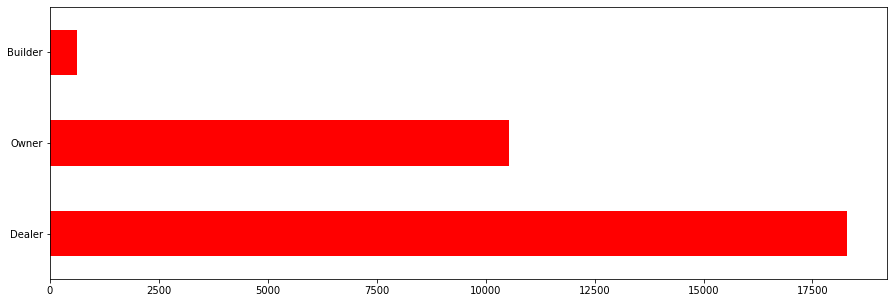

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
df['POSTED_BY'].value_counts().plot(kind='barh',color='r')
plt.show()

In [7]:
df['ADDRESS'] = df['ADDRESS'].str.split(',').apply(lambda x: x[-1])
df

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,Bangalore,12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,Mysore,12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,Bangalore,12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,Ghaziabad,28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,Kolkata,22.592200,88.484911,60.5
...,...,...,...,...,...,...,...,...,...,...,...,...
29446,Owner,0,0,3,BHK,2500.000000,1,1,Agra,27.140626,78.043277,45.0
29447,Owner,0,0,2,BHK,769.230769,1,1,Vapi,39.945409,-86.150721,16.0
29448,Dealer,0,0,2,BHK,1022.641509,1,1,Jaipur,26.928785,75.828002,27.1
29449,Owner,0,0,2,BHK,927.079009,1,1,Chennai,12.900150,80.227910,67.0


In [8]:
tier_1 = ["Ahmedabad", "Bengaluru", "Chennai", "Delhi", "Hyderabad", "Kolkata", "Mumbai", "Pune"]
tier_2 = ["Agra", "Ajmer", "Aligarh", "Amravati", "Amritsar", "Asansol", "Aurangabad", "Bareilly", "Belgaum", "Bhavnagar", "Bhiwandi", "Bhopal", "Bhubaneswar","Bikaner", "Bilaspur", "Bokaro Steel City","Chandigarh", "Coimbatore", "Cuttack"," Dehradun","Dhanbad", "Bhilai","Durgapur", "Erode", "Faridabad", "Firozabad", "Ghaziabad","Gorakhpur", "Gulbarga", "Guntur", "Gwalior", "Gurugram", "Guwahati", "Hamirpur", "Hubli–Dharwad", "Indore", "Jabalpur", "Jaipur", "Jalandhar", "Jalgaon", "Jammu", "Jamnagar", "Jamshedpur", "Jhansi", "Jodhpur","Navi Mumbai" ,"Kakinada", "Kannur"," Kanpur", "Karnal", "Kochi"," Kolhapur", "Kollam", "Kozhikode", "Kurnool", "Ludhiana","Lucknow","Madurai", "Malappuram"," Mathura", "Mangalore", "Meerut", "Moradabad", "Mysore", "Nagpur"," Nanded"," Nashik", "Nellore","Navi Mumbai","Noid", "Patna", "Puducherry", "Purulia", "Prayagraj", "Raipur","Rajkot", "Rajamahendravaram"," Ranchi", "Rourkela", "Ratlam", "Salem", "Sangli", "Shimla", "Siliguri"," Solapur", "Srinagar", "Surat", "Thanjavur", "Thiruvananthapuram", "Thrissur", "Tiruchirappalli", "Tirunelveli", "Tiruvannamalai", "Ujjain", "Vijayapura", "Vadodara", "Varanasi", "Vasai-Virar City", "Vijayawada", "Visakhapatnam", "Vellore", "Warangal"]

def mapping_city(city):

    if city in tier_1:
        return 0

    elif city in tier_2:
        return 1
        
    else:
        return 2

df['City_Tier'] = df['ADDRESS'].apply(mapping_city)
df

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),City_Tier
0,Owner,0,0,2,BHK,1300.236407,1,1,Bangalore,12.969910,77.597960,55.0,2
1,Dealer,0,0,2,BHK,1275.000000,1,1,Mysore,12.274538,76.644605,51.0,1
2,Owner,0,0,2,BHK,933.159722,1,1,Bangalore,12.778033,77.632191,43.0,2
3,Owner,0,1,2,BHK,929.921143,1,1,Ghaziabad,28.642300,77.344500,62.5,1
4,Dealer,1,0,2,BHK,999.009247,0,1,Kolkata,22.592200,88.484911,60.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29446,Owner,0,0,3,BHK,2500.000000,1,1,Agra,27.140626,78.043277,45.0,1
29447,Owner,0,0,2,BHK,769.230769,1,1,Vapi,39.945409,-86.150721,16.0,2
29448,Dealer,0,0,2,BHK,1022.641509,1,1,Jaipur,26.928785,75.828002,27.1,1
29449,Owner,0,0,2,BHK,927.079009,1,1,Chennai,12.900150,80.227910,67.0,0


In [9]:
import folium
from folium import Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster

In [10]:
# map = folium.Map(location=[22.00,78.00], tiles='cartodbpositron', zoom_start=6)


# for i in range(0,len(df)):
#     Circle(
#         location=[df.iloc[i]['LONGITUDE'], df.iloc[i]['LATITUDE']],
#         radius=100,
#         color='blue').add_to(map)

# # Display the map
# map

In [11]:
corr_data = df.corr()
corr_data["TARGET(PRICE_IN_LACS)"].sort_values(ascending=False)

TARGET(PRICE_IN_LACS)    1.000000
SQUARE_FT                0.402685
BHK_NO.                  0.112283
RERA                     0.067636
UNDER_CONSTRUCTION       0.055399
City_Tier                0.023339
LATITUDE                -0.017254
LONGITUDE               -0.031112
READY_TO_MOVE           -0.055399
RESALE                  -0.207378
Name: TARGET(PRICE_IN_LACS), dtype: float64

In [12]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler,Normalizer
def label_encoder(df, column_name):
    label_encoder = preprocessing.LabelEncoder()

    df[column_name]= label_encoder.fit_transform(df[column_name])
    print(column_name)
    for i in range(len(df[column_name].unique())):
        print("For {} : {}".format(i, label_encoder.inverse_transform([i])))
    print('-'*10)
    print(df[column_name].value_counts())
    print('-'*10)
    
    return df[column_name], label_encoder

In [13]:
df['POSTED_BY'], label_encoder_posted_by = label_encoder(df, 'POSTED_BY')
df['BHK_OR_RK'], label_encoder_posted_by = label_encoder(df, 'BHK_OR_RK')
df['ADDRESS'], label_encoder_posted_by = label_encoder(df, 'ADDRESS')

POSTED_BY
For 0 : ['Builder']
For 1 : ['Dealer']
For 2 : ['Owner']
----------
1    18291
2    10538
0      622
Name: POSTED_BY, dtype: int64
----------
BHK_OR_RK
For 0 : ['BHK']
For 1 : ['RK']
----------
0    29427
1       24
Name: BHK_OR_RK, dtype: int64
----------
ADDRESS
For 0 : ['Agartala']
For 1 : ['Agra']
For 2 : ['Ahmednagar']
For 3 : ['Ajmer']
For 4 : ['Akola']
For 5 : ['Aligarh']
For 6 : ['Allahabad']
For 7 : ['Alwar']
For 8 : ['Ambala']
For 9 : ['Amravati']
For 10 : ['Amritsar']
For 11 : ['Amroha']
For 12 : ['Anand']
For 13 : ['Anantapur']
For 14 : ['Angul']
For 15 : ['Arrah']
For 16 : ['Asansol']
For 17 : ['Aurangabad']
For 18 : ['Baddi']
For 19 : ['Bahadurgarh']
For 20 : ['Balasore']
For 21 : ['Bangalore']
For 22 : ['Bankura']
For 23 : ['Banswara']
For 24 : ['Barabanki']
For 25 : ['Bardhaman']
For 26 : ['Bareilly']
For 27 : ['Beed']
For 28 : ['Belgaum']
For 29 : ['Berhampur']
For 30 : ['Betul']
For 31 : ['Bhadrak']
For 32 : ['Bhagalpur']
For 33 : ['Bhandara']
For 34 : ['Bha

In [14]:
X = df[['POSTED_BY', 'UNDER_CONSTRUCTION', 'RERA', 'BHK_NO.', 'BHK_OR_RK',
       'SQUARE_FT', 'READY_TO_MOVE', 'RESALE', 'ADDRESS', 'LONGITUDE',
       'LATITUDE']]
Y = df[['TARGET(PRICE_IN_LACS)']]

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3)

In [16]:
# from sklearn.linear_model import LinearRegression
# regression = LinearRegression()
# regression.fit(X_train, Y_train)

In [17]:
# regression.score(X_train,Y_train)

In [18]:
# def adj_r2(x,y):
#     r2 = regression.score(x,y)
#     n = x.shape[0]
#     p = x.shape[1]
#     adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
#     return adjusted_r2
# adj_r2(X_train,Y_train)

In [19]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor().fit(X,Y)
print(dtr.score(X, Y))

0.9999715122822403


[]

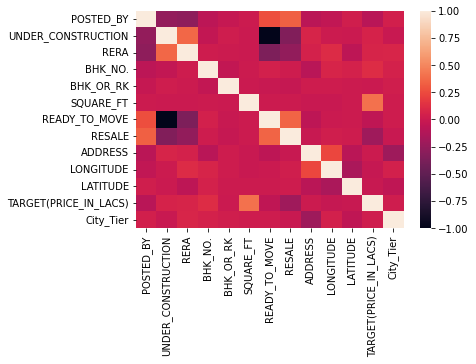

In [20]:
import seaborn as sns
sns.heatmap(df.corr())
plt.plot()